<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?
2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.
3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?
4. Repita la pregunta anterior observando las especies.

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?
6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?
8. Describa la distribucion con ayuda de la media, desviacion estandard
9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?
11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?



## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.
















In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [85]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [86]:
species = df["species"].unique()
print(species)

len(species)

['Adelie' 'Chinstrap' 'Gentoo']


3

### 2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [87]:
display(df.isna().sum())

df_clean = df.dropna().drop_duplicates().reset_index(drop=True)

display(df_clean.isna().sum())

df_clean.info()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### 3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [88]:
isla_counts = df_clean['island'].value_counts()
print("\nIsla con más ejemplares:", isla_counts.idxmax(), "con: ", isla_counts.max())

print("Hay un desvalance con respecto al menor de: ", isla_counts.max() - isla_counts.min())


Isla con más ejemplares: Biscoe con:  163
Hay un desvalance con respecto al menor de:  116


### 4. Repita la pregunta anterior observando las especies.

In [89]:
display(df_clean.groupby(['island', 'species', 'sex']).size())

island     species    sex   
Biscoe     Adelie     Female    22
                      Male      22
           Gentoo     Female    58
                      Male      61
Dream      Adelie     Female    27
                      Male      28
           Chinstrap  Female    34
                      Male      34
Torgersen  Adelie     Female    24
                      Male      23
dtype: int64

# Tendencias y visualizacion de las variables

### 5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [90]:
bill_stats = df_clean.groupby(['species', 'island'])['bill_length_mm'].agg(['mean', 'std'])
bill_stats

mean       std
species   island                        
Adelie    Biscoe     38.975000  2.480916
          Dream      38.520000  2.484276
          Torgersen  39.038298  3.028097
Chinstrap Dream      48.833824  3.339256
Gentoo    Biscoe     47.568067  3.106116

### 6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [91]:
idx_max = df_clean['bill_length_mm'].idxmax()
df_clean.iloc[idx_max]

,246
species,Gentoo
island,Biscoe
bill_length_mm,59.6
bill_depth_mm,17.0
flipper_length_mm,230.0
body_mass_g,6050.0
sex,Male


### 7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

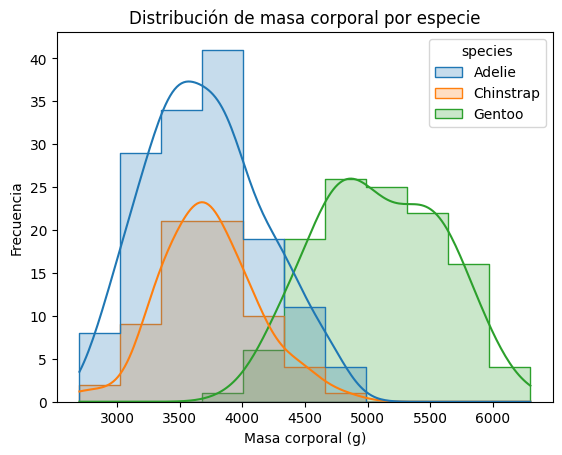

In [92]:
sns.histplot(data=df_clean, x='body_mass_g', hue='species', kde=True, element='step')
plt.title("Distribución de masa corporal por especie")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()

### 8. Describa la distribucion con ayuda de la media, desviacion estandar

In [93]:
display(df_clean.groupby(['island', 'species'])['body_mass_g'].agg(['mean', 'std']))

print("\nLa media de la masa corporal de los Gentoo sin importar la isla es mas alta")

mean         std
island    species                           
Biscoe    Adelie     3709.659091  487.733722
          Gentoo     5092.436975  501.476154
Dream     Adelie     3701.363636  448.774519
          Chinstrap  3733.088235  384.335081
Torgersen Adelie     3708.510638  451.846351


La media de la masa corporal de los Gentoo sin importar la isla es mas alta


### 9.¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [94]:
sex_stats = df_clean.groupby('sex')['body_mass_g'].agg(['mean', 'std'])

display(sex_stats)
diff = sex_stats.loc['Male','mean'] - sex_stats.loc['Female','mean']
print(f"\nDiferencia promedio (Machos − Hembras): {diff:.2f} g")

,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884



Diferencia promedio (Machos − Hembras): 683.41 g


### 10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [95]:
display(df_clean.groupby('species')['flipper_length_mm'].agg(['mean', 'std']))

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


### 11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [96]:
print("Longitud mínima de aleta:", df_clean['flipper_length_mm'].min(), "mm")
print("Longitud máxima de aleta:", df_clean['flipper_length_mm'].max(), "mm")

Longitud mínima de aleta: 172.0 mm
Longitud máxima de aleta: 231.0 mm


### 12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [97]:
display(df_clean.groupby(['island', 'species'])['bill_length_mm'].mean())

island     species  
Biscoe     Adelie       38.975000
           Gentoo       47.568067
Dream      Adelie       38.520000
           Chinstrap    48.833824
Torgersen  Adelie       39.038298
Name: bill_length_mm, dtype: float64

### 13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [98]:
display(df_clean.groupby(['island', 'species'])['bill_length_mm'].var())


island     species  
Biscoe     Adelie        6.154942
           Gentoo        9.647955
Dream      Adelie        6.171630
           Chinstrap    11.150630
Torgersen  Adelie        9.169371
Name: bill_length_mm, dtype: float64

# Relación entre caracteristicas de los pingüinos

### 14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

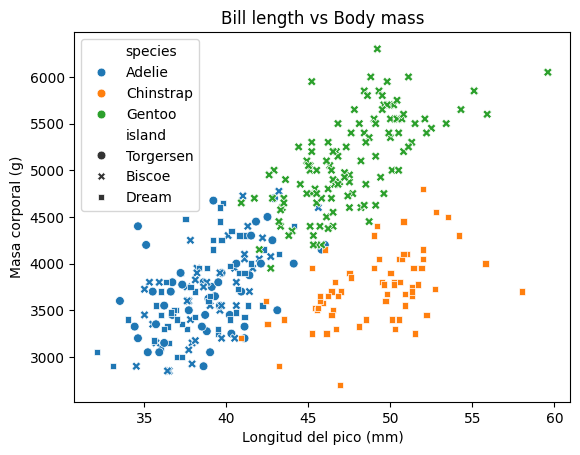

In [99]:
sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g',
                hue='species', style='island', s=40)
plt.title("Bill length vs Body mass")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()

### 15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

Adelie   : r = 0.544,  p = 1.242e-12
Chinstrap: r = 0.514,  p = 7.480e-06
Gentoo   : r = 0.667,  p = 1.262e-16


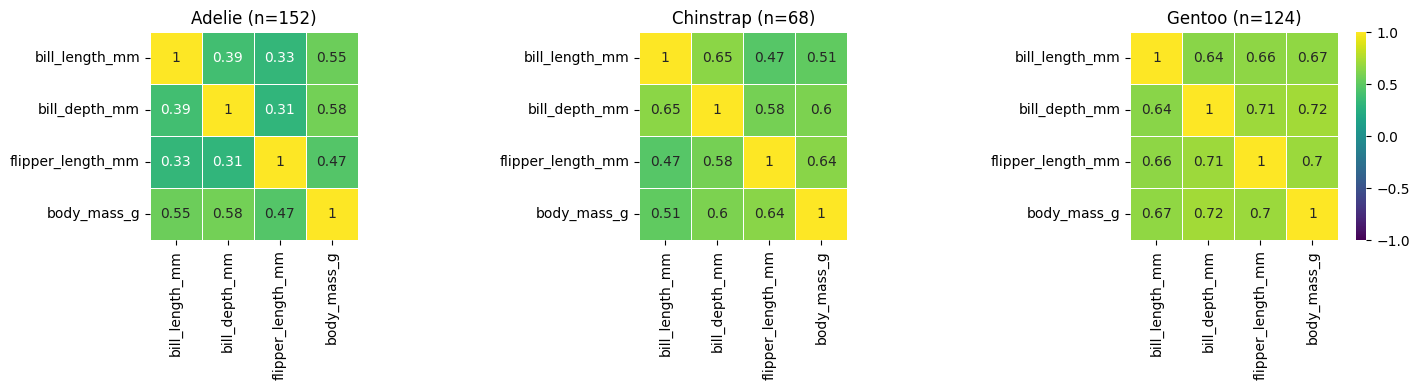

In [103]:
from scipy import stats

numeric_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
species_list = df['species'].unique()
n = len(species_list)

for sp, sub in df_clean.groupby('species'):
    r, p = stats.pearsonr(sub['bill_length_mm'], sub['body_mass_g'])
    print(f"{sp:9}: r = {r:.3f},  p = {p:.3e}")

fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), sharex=False, sharey=False)

for ax, sp in zip(axes, species_list):
    sub = df[df['species'] == sp][numeric_cols]
    corr = sub.corr()

    sns.heatmap(corr,
                annot=True,
                cmap='viridis',
                vmin=-1, vmax=1,
                square=True,
                linewidths=.5,
                cbar=(ax == axes[-1]),
                ax=ax)

    ax.set_title(f'{sp} (n={len(sub)})', fontsize=12)

plt.tight_layout()
plt.show()


### 16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

sex            Female        Male
species                          
Adelie     187.794521  192.410959
Chinstrap  191.735294  199.911765
Gentoo     212.706897  221.540984


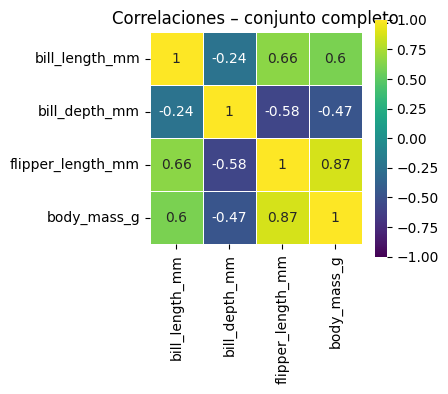

In [104]:
sex_flipper = (df_clean
               .groupby(['species','sex'])['flipper_length_mm']
               .mean()
               .unstack())
print(sex_flipper)

plt.figure(figsize=(4.5, 4))
sns.heatmap(df[numeric_cols].corr(),
            annot=True,
            cmap='viridis',
            vmin=-1, vmax=1,
            square=True,
            linewidths=.5)
plt.title('Correlaciones – conjunto completo', fontsize=12)
plt.tight_layout()
plt.show()

## Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

In [105]:
gentoo = df_clean[df_clean['species']=='Gentoo']
r, p = stats.pearsonr(gentoo['bill_length_mm'], gentoo['body_mass_g'])
n = len(gentoo)
t = r * (n-2)**0.5 / (1 - r**2)

print(f"Gentoo →  n={n},  r={r:.3f},  t={t:.2f},  p={p:.3e}")
alpha = 0.05
if p < alpha:
    print("🚩 Rechazamos H₀: existe correlación significativa.")
else:
    print("✔️ No se rechaza H₀: la correlación podría ser aleatoria.")

Gentoo →  n=119,  r=0.667,  t=12.98,  p=1.262e-16
🚩 Rechazamos H₀: existe correlación significativa.
